In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.polynomial_model import PolynomialRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation

In [8]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)
np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values


In [14]:
# Adding some random noise to salaries to reduce accuracy

noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)

Y = true_salaries + noise  # Final dependent variable with noise
 

In [16]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
 

In [20]:
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(X_poly, Y)  # Training the model

LinearRegression()

In [36]:
#step 5:calculate coefficient 
slope=model.coef_[0]
print(slope)


0.0


In [38]:
#step 5:calculate intercept
intercept=model.intercept_
print(intercept)

23.68560984973438


In [32]:
print(f"Equation of the line:Y={slope:.2f}X+{intercept:2f}")

Equation of the line:Y=0.00X+23.685610


In [40]:
#step 7:Predict values using model
Y_pred=model.predict(X_poly)

**Model Evaluating Matrics**

In [43]:
#1:Mean Squared Error(MSE)-Measured average squared difference between and predicted values 
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error(MSE): {mse:.2f}")

Mean Squared Error(MSE): 12.21


In [45]:
#2.Mean Absolute Error(MAE)-Measures average absolute difference between actual and predicted values
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error (MAE):{mae:.2f}")

Mean Absolute Error (MAE):2.66


In [47]:
#3.Root Mean Squared Error (RMSE)-Measures Standard deviation of residuals {errors}
rmse =np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE):{rmse:.2f}")

Root Mean Squared Error (RMSE):3.49


In [49]:
#4.R-squared (R2)-Represents how will the model fits the data (0 to 1,where 1 is best)
r2=r2_score(Y,Y_pred)
print(f"R-squared (R2): {r2:.2f}")

R-squared (R2): 0.94


In [51]:
#5.Adjusted R-squared (R2_adj)-Adjusted for the number of predictors,better for multiple regression
n=len(Y) #Number of observations
p=1  #Number of independent variables (Experience)
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared:{adj_r2:.2f}")


Adjusted R-squared:0.93


In [53]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     54.01
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.56e-05
Time:                        12:27:48   Log-Likelihood:                -26.699
No. Observations:                  10   AIC:                             59.40
Df Residuals:                       7   BIC:                             60.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6856     

C:\Users\sneha\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


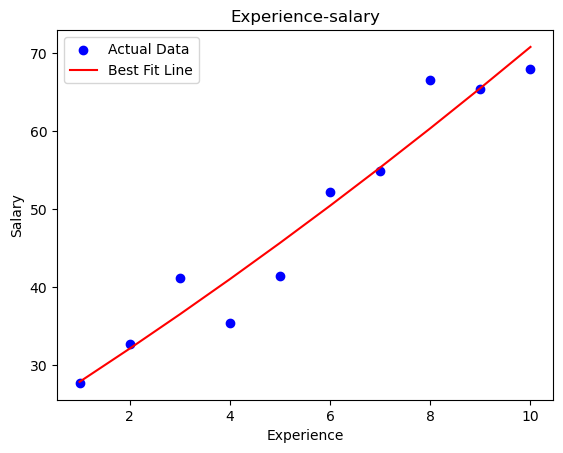

In [55]:
#step 8:plot the actual data points
plt.scatter(X,Y,color='blue',label='Actual Data')#scatter plot of actual values

#step 9:Plot the regression line (Best Fit Line)
plt.plot(X,Y_pred,color='red',label='Best Fit Line') #Regression Line

#step 10:Add  Labels and legend
plt.title("Experience-salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()

#Step11:Display the graph
plt.show()  # show the final plotted graph

In [ ]:
while True:
    try:
        exp=float(input("\nEnter yeras of experience to predict salary (or -1 to exit):"))
        if exp==-1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted salary for {exp} years of experience : {predicted_salary:.2f}k")
    except ValueError:
        print("please enter a valid number!")
        
            


Enter yeras of experience to predict salary (or -1 to exit): 7


please enter a valid number!



Enter yeras of experience to predict salary (or -1 to exit): 78


please enter a valid number!
